In [579]:
import numpy as np
import pandas as pd
from pandas.io.clipboard import init_osx_pyobjc_clipboard
from sklearn import pipeline

In [580]:
df = pd.read_csv('laptop_data.csv')

In [581]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [582]:
df.shape

(1303, 12)

In [583]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [584]:
df['Ram'] = df['Ram'].str.replace('GB','').astype(int)
df['Weight'] = df['Weight'].str.replace('kg','').astype(float)
df['Price'] = df['Price'].astype(int)

In [585]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 112.1+ KB


In [586]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\animesh jain\AppData\Local\Temp\ipykernel_25400\3077041100.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


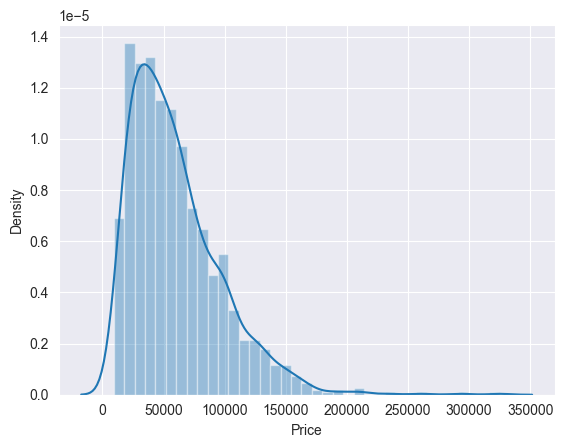

In [587]:
sns.distplot(df['Price'])
plt.show()

<Axes: xlabel='Company'>

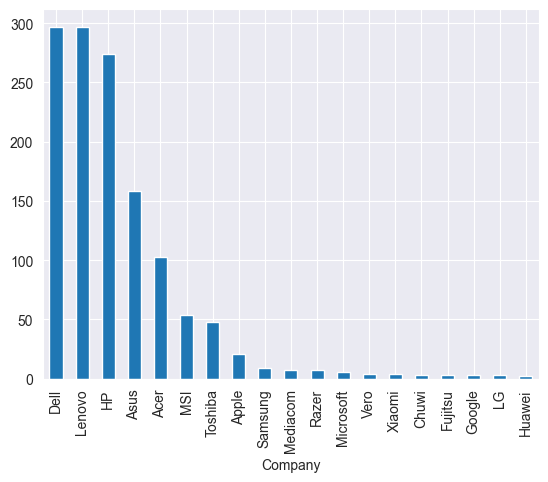

In [588]:
df['Company'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Price', ylabel='Company'>

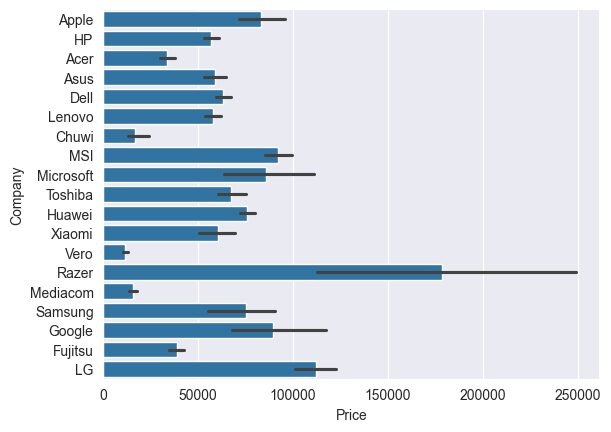

In [589]:
sns.barplot(x = 'Price', y = 'Company', data = df)

<Axes: xlabel='TypeName'>

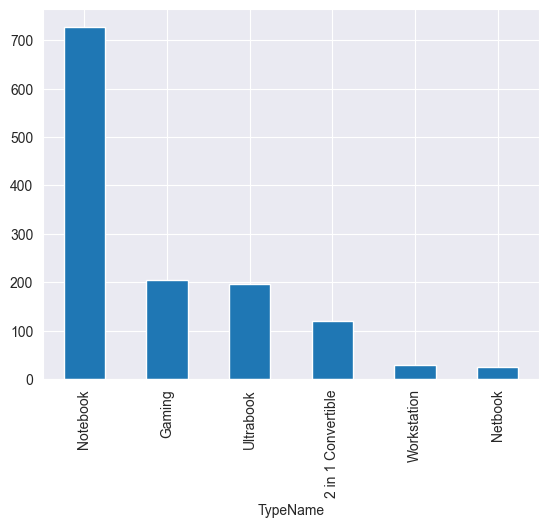

In [590]:
df['TypeName'].value_counts().plot(kind = 'bar')

C:\Users\animesh jain\AppData\Local\Temp\ipykernel_25400\831635304.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

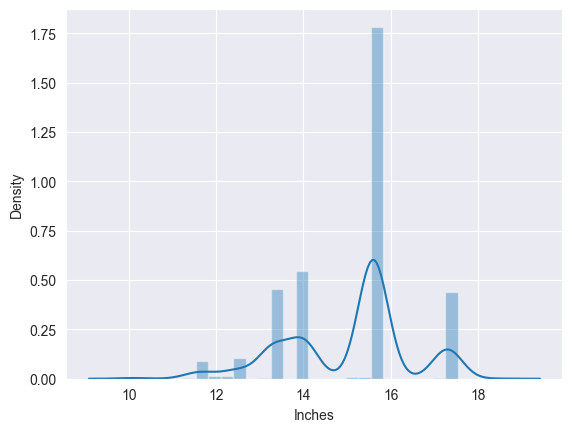

In [591]:
sns.distplot(df['Inches'])

In [592]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df['Touchscreen'].align ='center'

In [593]:
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [594]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1


In [595]:
new = df['ScreenResolution'].str.split('x' , n = 1 , expand = True)

In [596]:
df['X_Resolution'] = new[0]
df['Y_Resolution'] = new[1]

In [597]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_Resolution,Y_Resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,IPS Panel Retina Display 2560,1600


In [598]:
df['X_Resolution'] = df['X_Resolution'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply( lambda x: x[0])

In [599]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_Resolution,Y_Resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,2560,1600


In [600]:
df['X_Resolution'] = df['X_Resolution'].astype(int)
df['Y_Resolution'] = df['Y_Resolution'].astype(int)

In [601]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   int64  
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_Resolution      1303 non-null   int64  
 14  Y_Resolution      1303 non-null   int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 152.8+ KB


In [602]:
df.corr(numeric_only = True)['Price']

Inches          0.068196
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
IPS             0.252207
X_Resolution    0.556529
Y_Resolution    0.552809
Name: Price, dtype: float64

In [603]:
# we will use ppi , because it is strongly correlated with price and to determine the price of laptop more accurately then  we will have to use ppi

In [604]:
df['PPI'] = (((df['X_Resolution']**2)+(df['Y_Resolution']**2))**0.5/df['Inches']).round(2)

In [605]:
df['PPI']

0       226.98
1       127.68
2       141.21
3       220.53
4       226.98
         ...  
1298    157.35
1299    276.05
1300    111.94
1301    100.45
1302    100.45
Name: PPI, Length: 1303, dtype: float64

In [606]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   int64  
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_Resolution      1303 non-null   int64  
 14  Y_Resolution      1303 non-null   int64  
 15  PPI               1303 non-null   float64
dtypes: float64(3), int64(6), object(7)
memory 

In [607]:
df.drop(columns=['ScreenResolution','X_Resolution','Y_Resolution','Inches'], inplace = True)

In [608]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Cpu          1303 non-null   object 
 3   Ram          1303 non-null   int64  
 4   Memory       1303 non-null   object 
 5   Gpu          1303 non-null   object 
 6   OpSys        1303 non-null   object 
 7   Weight       1303 non-null   float64
 8   Price        1303 non-null   int64  
 9   Touchscreen  1303 non-null   int64  
 10  IPS          1303 non-null   int64  
 11  PPI          1303 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 122.3+ KB


In [609]:
df['Cpu name'] = df['Cpu'].apply(lambda x: x.split()[0:3])

In [610]:
df['Cpu name']

0            [Intel, Core, i5]
1            [Intel, Core, i5]
2            [Intel, Core, i5]
3            [Intel, Core, i7]
4            [Intel, Core, i5]
                 ...          
1298         [Intel, Core, i7]
1299         [Intel, Core, i7]
1300    [Intel, Celeron, Dual]
1301         [Intel, Core, i7]
1302    [Intel, Celeron, Dual]
Name: Cpu name, Length: 1303, dtype: object

In [611]:
df['Cpu name'] = df['Cpu name'].apply(lambda x: " ".join(x))

In [612]:
df['Cpu name']

0            Intel Core i5
1            Intel Core i5
2            Intel Core i5
3            Intel Core i7
4            Intel Core i5
               ...        
1298         Intel Core i7
1299         Intel Core i7
1300    Intel Celeron Dual
1301         Intel Core i7
1302    Intel Celeron Dual
Name: Cpu name, Length: 1303, dtype: object

In [613]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Cpu          1303 non-null   object 
 3   Ram          1303 non-null   int64  
 4   Memory       1303 non-null   object 
 5   Gpu          1303 non-null   object 
 6   OpSys        1303 non-null   object 
 7   Weight       1303 non-null   float64
 8   Price        1303 non-null   int64  
 9   Touchscreen  1303 non-null   int64  
 10  IPS          1303 non-null   int64  
 11  PPI          1303 non-null   float64
 12  Cpu name     1303 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 132.5+ KB


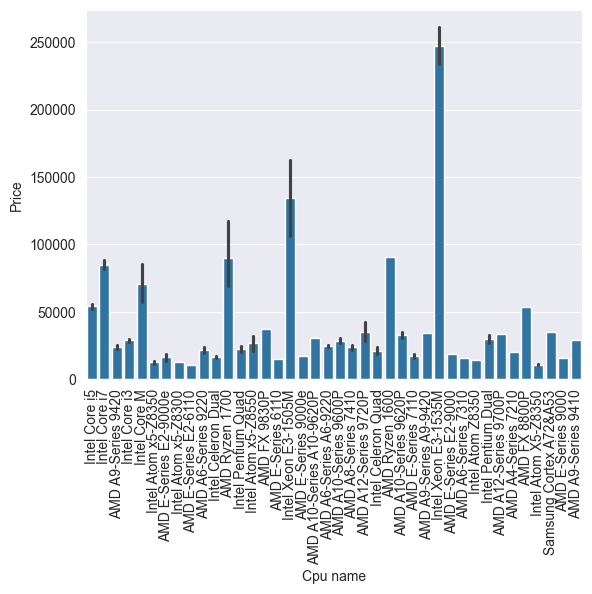

In [614]:
sns.barplot(x = 'Cpu name', y = 'Price', data = df)
plt.xticks(rotation = 'vertical')
plt.show()

In [615]:
def fetch_processor(text):
    if text == "Intel Core i5" or text == "Intel Core i7" or text == "Intel Core i3":
        return text
    else:
        if text.split()[0] == "Intel":
            return "Other Intel processors"
        else:
            return "AMD processors"


In [616]:
df['Cpu brand'] = df['Cpu name'].apply(fetch_processor)

In [617]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.98,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.68,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.21,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.53,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.98,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

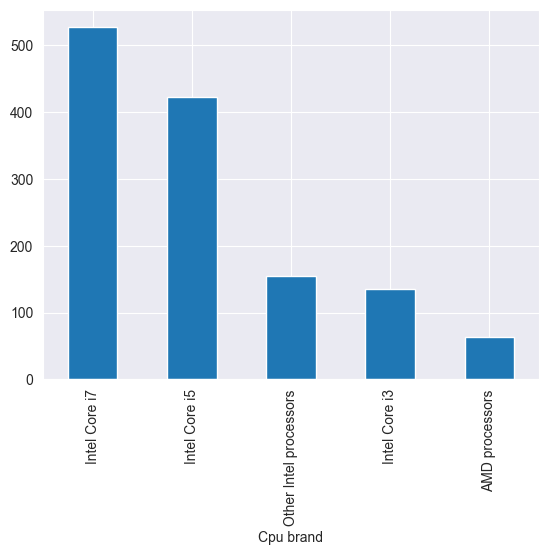

In [618]:
df['Cpu brand'].value_counts().plot(kind='bar')

<Axes: xlabel='Cpu brand', ylabel='Price'>

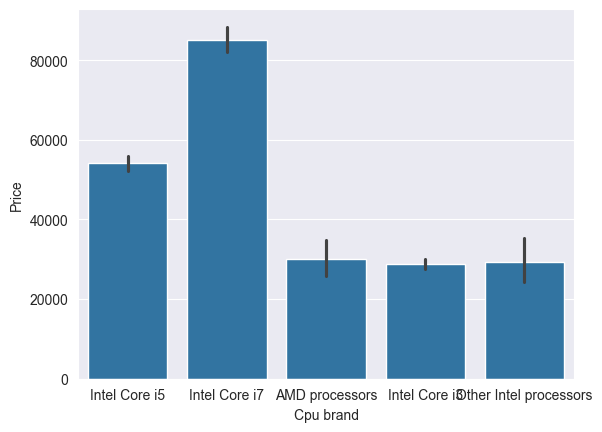

In [619]:
sns.barplot(x = 'Cpu brand', y = 'Price', data = df)

In [620]:
df.drop(columns = ['Cpu','Cpu name'],inplace = True)

In [621]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int64  
 3   Memory       1303 non-null   object 
 4   Gpu          1303 non-null   object 
 5   OpSys        1303 non-null   object 
 6   Weight       1303 non-null   float64
 7   Price        1303 non-null   int64  
 8   Touchscreen  1303 non-null   int64  
 9   IPS          1303 non-null   int64  
 10  PPI          1303 non-null   float64
 11  Cpu brand    1303 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.3+ KB


In [622]:
df['Memory']

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: Memory, Length: 1303, dtype: object

In [623]:
import re

def parse_memory(mem):
    ssd = hdd = flash = hybrid = 0
    if pd.isna(mem):
        return ssd, hdd, flash, hybrid
    mem = mem.upper()
    parts = re.findall(r'(\d+)\s*(GB|TB)\s*(SSD|HDD|FLASH STORAGE)', mem)
    for size, unit, storage_type in parts:
        size = int(size)
        if unit == 'TB':
            size *= 1024
        if storage_type == 'SSD':
            ssd += size
        elif storage_type == 'HDD':
            hdd += size
        elif storage_type == 'FLASH STORAGE':
            flash += size
    if 'HYBRID' in mem:
        hybrid = 1
    return ssd, hdd, flash, hybrid


In [624]:
df[['SSD', 'HDD', 'Flash Storage', 'Hybrid']] = df['Memory'].apply(
    lambda x: pd.Series(parse_memory(x))
)

In [625]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Ram            1303 non-null   int64  
 3   Memory         1303 non-null   object 
 4   Gpu            1303 non-null   object 
 5   OpSys          1303 non-null   object 
 6   Weight         1303 non-null   float64
 7   Price          1303 non-null   int64  
 8   Touchscreen    1303 non-null   int64  
 9   IPS            1303 non-null   int64  
 10  PPI            1303 non-null   float64
 11  Cpu brand      1303 non-null   object 
 12  SSD            1303 non-null   int64  
 13  HDD            1303 non-null   int64  
 14  Flash Storage  1303 non-null   int64  
 15  Hybrid         1303 non-null   int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 163.0+ KB


In [626]:
df.drop(columns = ['Memory'], inplace = True)

In [627]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Ram            1303 non-null   int64  
 3   Gpu            1303 non-null   object 
 4   OpSys          1303 non-null   object 
 5   Weight         1303 non-null   float64
 6   Price          1303 non-null   int64  
 7   Touchscreen    1303 non-null   int64  
 8   IPS            1303 non-null   int64  
 9   PPI            1303 non-null   float64
 10  Cpu brand      1303 non-null   object 
 11  SSD            1303 non-null   int64  
 12  HDD            1303 non-null   int64  
 13  Flash Storage  1303 non-null   int64  
 14  Hybrid         1303 non-null   int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 152.8+ KB


In [628]:
df.drop(columns = ['Flash Storage','Hybrid','HDD'], inplace = True)

In [629]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int64  
 3   Gpu          1303 non-null   object 
 4   OpSys        1303 non-null   object 
 5   Weight       1303 non-null   float64
 6   Price        1303 non-null   int64  
 7   Touchscreen  1303 non-null   int64  
 8   IPS          1303 non-null   int64  
 9   PPI          1303 non-null   float64
 10  Cpu brand    1303 non-null   object 
 11  SSD          1303 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 122.3+ KB


In [630]:
df['Gpu brand'] = df['Gpu'].apply(lambda x: x.split()[0])

In [631]:
df.drop(columns = ['Gpu'],inplace = True)

In [632]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378,0,1,226.98,Intel Core i5,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895,0,0,127.68,Intel Core i5,0,Intel
2,HP,Notebook,8,No OS,1.86,30636,0,0,141.21,Intel Core i5,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195,0,1,220.53,Intel Core i7,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095,0,1,226.98,Intel Core i5,256,Intel


In [633]:
df = df[df['Gpu brand'] != 'ARM']

In [634]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int64  
 3   OpSys        1302 non-null   object 
 4   Weight       1302 non-null   float64
 5   Price        1302 non-null   int64  
 6   Touchscreen  1302 non-null   int64  
 7   IPS          1302 non-null   int64  
 8   PPI          1302 non-null   float64
 9   Cpu brand    1302 non-null   object 
 10  SSD          1302 non-null   int64  
 11  Gpu brand    1302 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.2+ KB


In [635]:
def fetch_os(input):
    if (input == "Windows 10" or input == "Windows 7" or input == "Windows 10 S"):
        return 'Windows'
    else:
        if input == "macOS" or input == "Mac OS X":
            return "Mac"
        else:
            return "Others"


In [636]:
df['Operating System'] = df['OpSys'].apply(fetch_os)

In [637]:
df['Operating System']

0           Mac
1           Mac
2        Others
3           Mac
4           Mac
         ...   
1298    Windows
1299    Windows
1300    Windows
1301    Windows
1302    Windows
Name: Operating System, Length: 1302, dtype: object

In [638]:
df.drop(columns = ['OpSys'], inplace = True)

<Axes: xlabel='Operating System', ylabel='Price'>

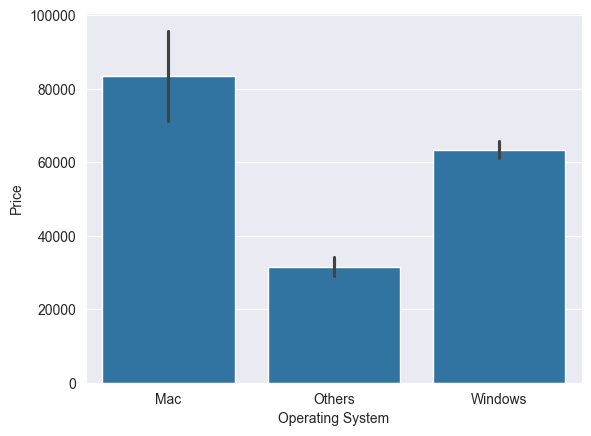

In [639]:
sns.barplot(x = 'Operating System', y = 'Price', data = df)

In [640]:
df.corr(numeric_only = True)['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
IPS            0.253319
PPI            0.475387
SSD            0.670543
Name: Price, dtype: float64

<Axes: >

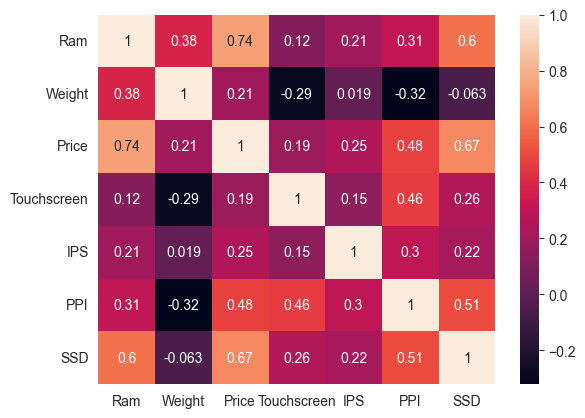

In [641]:
sns.heatmap(df.corr(numeric_only = True), annot=True)

In [642]:
x = df.drop(columns = ['Price'])
y = np.log(df['Price'])

In [643]:
y

0       11.175745
1       10.776766
2       10.329931
3       11.814473
4       11.473093
          ...    
1298    10.433880
1299    11.288106
1300     9.409273
1301    10.614106
1302     9.886341
Name: Price, Length: 1302, dtype: float64

In [644]:
x

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,Cpu brand,SSD,Gpu brand,Operating System
0,Apple,Ultrabook,8,1.37,0,1,226.98,Intel Core i5,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.68,Intel Core i5,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.21,Intel Core i5,256,Intel,Others
3,Apple,Ultrabook,16,1.83,0,1,220.53,Intel Core i7,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.98,Intel Core i5,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.35,Intel Core i7,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.05,Intel Core i7,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.94,Other Intel processors,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.45,Intel Core i7,0,AMD,Windows


In [645]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [646]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [647]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

## Linear Regression

In [648]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output = False,drop = 'first'),[0,1,7,9,10])
],remainder = 'passthrough')
step2 = LinearRegression()
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
print('R2 Score',r2_score(y_test,y_pred))
print('Mean Absolute Error',mean_absolute_error(y_test,y_pred))

R2 Score 0.8000406389147575
Mean Absolute Error 0.20450851313149906


## Ridge Regression

In [649]:
from sklearn.linear_model import Ridge

pipe = Pipeline([
    ('preprocess', step1),
    ('model', Ridge(alpha=1.0))
])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2: 0.8021871955120438
MAE: 0.2032764122169884


## Lasso Regression

In [650]:
from sklearn.linear_model import Lasso

pipe = Pipeline([
    ('preprocess', step1),
    ('model', Lasso(alpha=0.01))
])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2: 0.7740256418721255
MAE: 0.21376576011768317


## KNN

In [651]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ('preprocess', step1),
    ('scaler', StandardScaler()),
    ('model', KNeighborsRegressor(n_neighbors=3))
])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2: 0.822659099837191
MAE: 0.18644524659192555


## Decision Tree Regressor

In [652]:
from sklearn.tree import DecisionTreeRegressor

pipe = Pipeline([
    ('preprocess', step1),
    ('model', DecisionTreeRegressor(max_depth=8))
])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2: 0.8092614584037088
MAE: 0.194643321397672


## SVM

In [653]:
from sklearn.svm import SVR

pipe = Pipeline([
    ('preprocess', step1),
    ('scaler', StandardScaler()),
    ('model', SVR(kernel='rbf', C=100, epsilon=0.1))
])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2: 0.8323639179471809
MAE: 0.18831804965708068


## Random Forest

In [654]:
from sklearn.ensemble import RandomForestRegressor

pipe = Pipeline([
    ('preprocess', step1),
    ('model', RandomForestRegressor(
        n_estimators=99,
        max_depth=15,
        random_state=4,
        max_samples=0.5,
        max_features=0.1
    ))
])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2: 0.8814658076775125
MAE: 0.1552035193703001


## ExtraTrees

In [655]:
from sklearn.ensemble import ExtraTreesRegressor

pipe = Pipeline([
    ('preprocess', step1),
    ('model', ExtraTreesRegressor(
        n_estimators=100,
        max_depth=15,
        random_state=42,
        max_features=0.2,
    ))
])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2: 0.8761692541680357
MAE: 0.1590558870967183


## Ada Boost

In [656]:
from sklearn.ensemble import AdaBoostRegressor

pipe = Pipeline([
    ('preprocess', step1),
    ('model', AdaBoostRegressor(
        n_estimators=15,
        learning_rate=1,
        random_state=42
    ))
])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2: 0.7915637891037419
MAE: 0.22088377152377953


## Gradient Boost

In [657]:
from sklearn.ensemble import GradientBoostingRegressor

pipe = Pipeline([
    ('preprocess', step1),
    ('model', GradientBoostingRegressor(
        n_estimators=760,
        learning_rate=0.04,
        max_depth=3,
        random_state=42
    ))
])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2: 0.8697623830392457
MAE: 0.16253074062771447


## Exporting The Model

In [658]:
import pickle

In [659]:
pickle.dump(x,open('df.pkl','wb'))
pickle.dump(pipe,open('pipeline.pkl','wb'))

In [660]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1302 non-null   object 
 1   TypeName          1302 non-null   object 
 2   Ram               1302 non-null   int64  
 3   Weight            1302 non-null   float64
 4   Touchscreen       1302 non-null   int64  
 5   IPS               1302 non-null   int64  
 6   PPI               1302 non-null   float64
 7   Cpu brand         1302 non-null   object 
 8   SSD               1302 non-null   int64  
 9   Gpu brand         1302 non-null   object 
 10  Operating System  1302 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.1+ KB
